### Bài 1

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data = [
    {'City': 'Hai Phong', 'Temperature': 32},
    {'City': 'Da Nang', 'Temperature': 29},
    {'City': 'Can Tho', 'Temperature': 34}
]
vec = DictVectorizer(sparse=False)

# Chuyển đổi dữ liệu thành dạng số
X = vec.fit_transform(data)

print("Dữ liệu sau khi biến đổi:\n", X)
print("Feature names:", vec.get_feature_names_out())

Dữ liệu sau khi biến đổi:
 [[ 0.  0.  1. 32.]
 [ 0.  1.  0. 29.]
 [ 1.  0.  0. 34.]]
Feature names: ['City=Can Tho' 'City=Da Nang' 'City=Hai Phong' 'Temperature']


### Bài 2

In [3]:
data = [
    {
        'word-2': 'a',
        'pos-2': 'DT',
        'word-1': 'cat',
        'pos-1': 'NN',
        'word+1': 'on',
        'pos+1': 'PP',
    }
]

vec = DictVectorizer(sparse=False)

X = vec.fit_transform(data)

print("Dữ liệu sau khi biến đổi:\n", X)

print("Feature names:", vec.get_feature_names_out())


Dữ liệu sau khi biến đổi:
 [[1. 1. 1. 1. 1. 1.]]
Feature names: ['pos+1=PP' 'pos-1=NN' 'pos-2=DT' 'word+1=on' 'word-1=cat' 'word-2=a']


### Bài 3

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data = [
    'Today I go to the school',
    'I go to the school today',
    'Today I stay at home',
    'Today do I go to the school?'
]

vectorizer = CountVectorizer()

# Biến đổi dữ liệu thành ma trận số
X = vectorizer.fit_transform(data)

print("Dữ liệu sau khi biến đổi:\n", X.toarray())

print("Feature names:", vectorizer.get_feature_names_out())


Dữ liệu sau khi biến đổi:
 [[0 0 1 0 1 0 1 1 1]
 [0 0 1 0 1 0 1 1 1]
 [1 0 0 1 0 1 0 0 1]
 [0 1 1 0 1 0 1 1 1]]
Feature names: ['at' 'do' 'go' 'home' 'school' 'stay' 'the' 'to' 'today']


### Bài 4

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

counts = np.array([
    [3, 0, 1],
    [2, 0, 0],
    [3, 0, 0],
    [4, 0, 0],
    [3, 2, 0],
    [3, 0, 2]
])

tfidf_transformer = TfidfTransformer()

# Tính toán TF-IDF
tfidf_matrix = tfidf_transformer.fit_transform(counts)

print("Ma trận TF-IDF:\n", tfidf_matrix.toarray())


Ma trận TF-IDF:
 [[0.85151335 0.         0.52433293]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.55422893 0.83236428 0.        ]
 [0.63035731 0.         0.77630514]]


### Bài 5

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Chọn 4 lớp để phân loại
categories = ['rec.sport.baseball', 'sci.space', 'comp.graphics', 'talk.politics.mideast']

newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Hiển thị số lượng mẫu trong từng lớp
print("Số lượng mẫu trong tập dữ liệu:", len(newsgroups.data))
print("Tên các lớp:", newsgroups.target_names)


Số lượng mẫu trong tập dữ liệu: 3894
Tên các lớp: ['comp.graphics', 'rec.sport.baseball', 'sci.space', 'talk.politics.mideast']


In [11]:
# Vector hóa dữ liệu bằng TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Chia dữ liệu thành tập Train/Test (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Logistic Regression (Thay thế cho Linear Regression vì bài toán phân loại)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)


In [15]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nĐánh giá mô hình: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Đánh giá các mô hình
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")



Đánh giá mô hình: KNN
Accuracy: 0.29781771501925547
F1-score: 0.280285347439868
Confusion Matrix:
 [[ 43 125  32  20]
 [ 20 109  33  16]
 [ 28  96  43  22]
 [ 38  79  38  37]]

Đánh giá mô hình: Decision Tree
Accuracy: 0.7509627727856226
F1-score: 0.7536555103268411
Confusion Matrix:
 [[163  29  20   8]
 [ 12 142  13  11]
 [ 15  30 136   8]
 [  9  29  10 144]]

Đánh giá mô hình: Logistic Regression
Accuracy: 0.8947368421052632
F1-score: 0.8952645604841013
Confusion Matrix:
 [[193  14  13   0]
 [  4 167   4   3]
 [  4  13 164   8]
 [  5  10   4 173]]


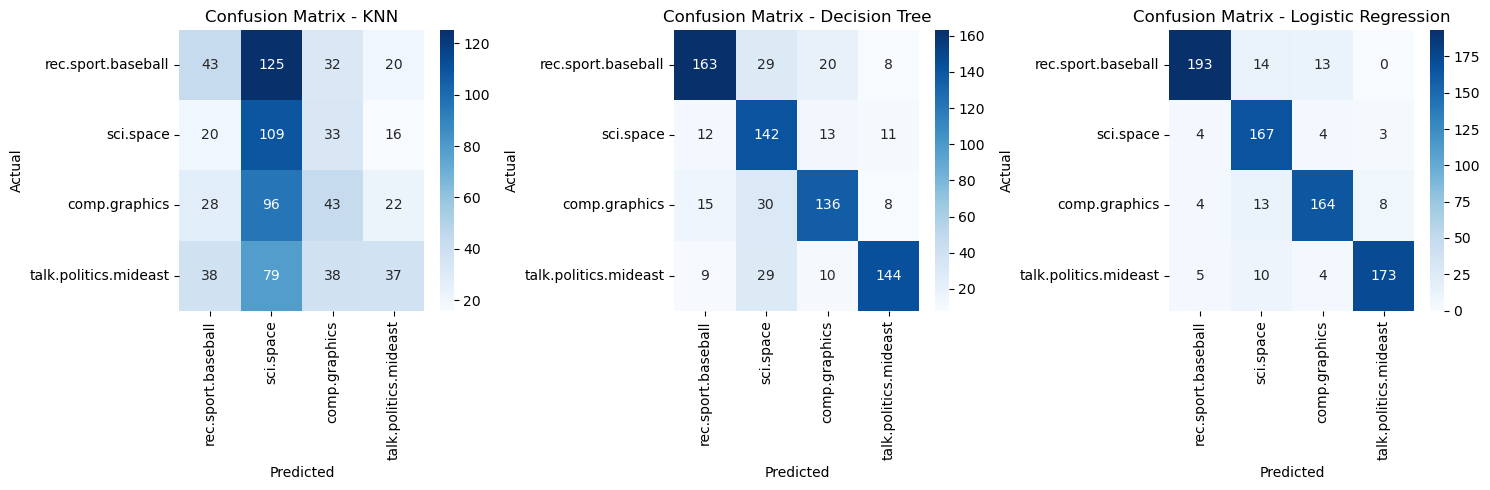

In [16]:
# Tạo confusion matrix cho từng mô hình
models = {'KNN': y_pred_knn, 'Decision Tree': y_pred_dt, 'Logistic Regression': y_pred_lr}

plt.figure(figsize=(15, 5))

for i, (model_name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")

plt.tight_layout()
plt.show()
